In [1]:
import sys
sys.path.append("/tf/easl-eye")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Local Package
import easl_eye as eye
from easl_eye.io import *
from easl_eye.preprocess import eyes as blink
from easl_eye.viz import raw_gaze_plot

In [3]:
# Loading the two different datasets
image_tracking = get_viewer_tracking_info(url="http://amc-tensor1.ucdenver.pvt/eyetracking")
eye_tracking = load_eyetracking_data(fname="/tf/eye-tracking/test_gaze_data.csv")

In [4]:
eye.align_tracking_data(image_tracking=image_tracking, eye_tracking=eye_tracking)

/tf/easl-eye/easl_eye/integrate.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_tracking['ui_timestamp_us'] = image_tracking['ui_timestamp'].apply(convert2us)
/tf/easl-eye/easl_eye/integrate.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_tracking['adjusted_timestamp'] = image_tracking['ui_timestamp_us'].apply(
/tf/easl-eye/easl_eye/integrate.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,right_x,right_y,left_x,left_y,timestamp_hardware,id,created_at,updated_at,sessionID,ui_timestamp,current_uid,ui_timestamp_date,ui_timestamp_time,ui_timestamp_us
1989-04-07 04:15:42.232,NaN,NaN,NaN,NaN,NaN,4.0,None,None,eyetracking-test-1,2024-05-14T15:48:04.740Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:04.740Z,1.715702e+13
1989-04-07 04:15:47.082,NaN,NaN,NaN,NaN,NaN,5.0,None,None,eyetracking-test-1,2024-05-14T15:48:05.225Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:05.225Z,1.715702e+13
1989-04-07 04:42:43.521,(0.26330816745758057,0.7664732933044434),(0.2840283215045929,0.7468969821929932),4.155418e+11,5.0,None,None,eyetracking-test-1,2024-05-14T15:48:05.225Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:05.225Z,1.715702e+13
1989-04-07 04:42:51.856,(0.24701371788978577,0.7690545916557312),(0.278091698884964,0.7467371225357056),4.155418e+11,5.0,None,None,eyetracking-test-1,2024-05-14T15:48:05.225Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:05.225Z,1.715702e+13
1989-04-07 04:43:00.196,(0.2643909752368927,0.7783610224723816),(0.2773456871509552,0.7540733218193054),4.155419e+11,5.0,None,None,eyetracking-test-1,2024-05-14T15:48:05.225Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:05.225Z,1.715702e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-04-08 01:37:30.942,(0.2528960406780243,0.751578152179718),(0.25949689745903015,0.7668179273605347),4.156171e+11,439.0,None,None,eyetracking-test-1,2024-05-14T17:56:15.611Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:15.611Z,1.715709e+13
1989-04-08 01:37:31.382,(0.2528960406780243,0.751578152179718),(0.25949689745903015,0.7668179273605347),4.156171e+11,440.0,None,None,eyetracking-test-1,2024-05-14T17:56:15.655Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:15.655Z,1.715709e+13
1989-04-08 01:37:36.632,(0.2528960406780243,0.751578152179718),(0.25949689745903015,0.7668179273605347),4.156171e+11,441.0,None,None,eyetracking-test-1,2024-05-14T17:56:16.180Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:16.180Z,1.715709e+13
1989-04-08 01:37:36.942,(0.2528960406780243,0.751578152179718),(0.25949689745903015,0.7668179273605347),4.156171e+11,442.0,None,None,eyetracking-test-1,2024-05-14T17:56:16.211Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:16.211Z,1.715709e+13


In [9]:
eye_tracking = blink.format_data(eye_tracking, 
                                 screen_size=(59.789,33.631), # cm
                                 screen_res=(2560,1440), # px
                                 viewing_dist=82) # cm

ValueError: Length of values (1) does not match length of index (9036)

In [24]:
image_tracking['ui_timestamp_date'] = image_tracking['ui_timestamp'].apply(lambda s: s.split('T')[0])
image_tracking['ui_timestamp_time'] = image_tracking['ui_timestamp'].apply(lambda s: s.split('T')[1])

In [25]:
image_tracking = image_tracking.loc[image_tracking['ui_timestamp_date'] == '2024-05-14']

In [37]:
from datetime import datetime

def convert2us(date):
    # Convert the date string to a datetime object
    date = datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ')

    # Convert the datetime object to microseconds
    microseconds = date.timestamp() * 1e4
    return microseconds

image_tracking['ui_timestamp_us'] = image_tracking['ui_timestamp'].apply(convert2us)

In [39]:
max(image_tracking.ui_timestamp_us) - min(image_tracking.ui_timestamp_us)

76915120.0

In [40]:
max(eye_tracking.timestamp_hardware) - min(eye_tracking.timestamp_hardware)

75294021

In [41]:
max(eye_tracking.timestamp_system) - min(eye_tracking.timestamp_system)

75293831

In [43]:
(76915120.0 - 75294021) / 76915120.0

0.02107646714976197

In [48]:
(max(image_tracking.ui_timestamp_us) - max(eye_tracking.timestamp_system)) / (min(image_tracking.ui_timestamp_us) - min(eye_tracking.timestamp_system))

1.0000000979684713

In [53]:
max(image_tracking.adjusted_timestamp)

608002657352.0

In [51]:
image_tracking['adjusted_timestamp'] = image_tracking['ui_timestamp_us'].apply(lambda t: t - (max(image_tracking.ui_timestamp_us) - max(eye_tracking.timestamp_system)))

In [58]:
image_tracking['adjusted_timestamp'] = pd.to_datetime(image_tracking['adjusted_timestamp'], unit='ms')
image_tracking.set_index('adjusted_timestamp', inplace=True)

In [59]:
image_tracking

,id,created_at,updated_at,sessionID,ui_timestamp,current_uid,ui_timestamp_date,ui_timestamp_time,ui_timestamp_us
adjusted_timestamp,,,,,,,,,
1989-04-07 04:15:42.232,4,None,None,eyetracking-test-1,2024-05-14T15:48:04.740Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:04.740Z,1.715702e+13
1989-04-07 04:15:47.082,5,None,None,eyetracking-test-1,2024-05-14T15:48:05.225Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:48:05.225Z,1.715702e+13
1989-04-07 04:46:21.892,6,None,None,eyetracking-test-1,2024-05-14T15:51:08.706Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:51:08.706Z,1.715702e+13
1989-04-07 04:46:24.372,7,None,None,eyetracking-test-1,2024-05-14T15:51:08.954Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:51:08.954Z,1.715702e+13
1989-04-07 04:46:26.252,8,None,None,eyetracking-test-1,2024-05-14T15:51:09.142Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,15:51:09.142Z,1.715702e+13
...,...,...,...,...,...,...,...,...,...
1989-04-08 01:37:30.942,439,None,None,eyetracking-test-1,2024-05-14T17:56:15.611Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:15.611Z,1.715709e+13
1989-04-08 01:37:31.382,440,None,None,eyetracking-test-1,2024-05-14T17:56:15.655Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:15.655Z,1.715709e+13
1989-04-08 01:37:36.632,441,None,None,eyetracking-test-1,2024-05-14T17:56:16.180Z,wadors:http://amc-tensor1.ucdenver.pvt:808/pac...,2024-05-14,17:56:16.180Z,1.715709e+13


In [61]:
eye_tracking['timestamp_system'] = pd.to_datetime(eye_tracking['timestamp_system'], unit='ms')
eye_tracking.set_index('timestamp_system', inplace=True)

In [61]:
aligned_dataset = eye_tracking.join(image_tracking, how='outer').fillna(method='ffill')

In [62]:
aligned_dataset.current_uid[100].replace('wadors:', '')

'http://amc-tensor1.ucdenver.pvt:808/pacs/dicom-web/studies/1.2.840.114350.2.19.2.798268.2.63361197.1/series/1.3.12.2.1107.5.2.30.26451.2016110714164943896821018.0.0.0/instances/1.3.12.2.1107.5.2.30.26451.201611071420505220321419/frames/1'

In [63]:
import requests
import pydicom
from pydicom.filebase import DicomBytesIO

url = aligned_dataset.current_uid[100].replace('wadors:', '')
# Send a GET request to the URL
response = requests.get(url)

In [64]:
response

<Response [200]>

In [65]:
dicom_file = DicomBytesIO(response.content)
dicom_dataset = pydicom.dcmread(dicom_file, force=True)

In [107]:
content = "\r\n".join(str(response.content).split('\\r\\n')[1:]).encode()

In [111]:
dicom_file = DicomBytesIO(content)
dicom_dataset = pydicom.dcmread(dicom_file, force=True)

In [79]:
dicom_dataset.decode()

In [86]:
decoded_text = response.content.decode('unicode_escape')

<ipython-input-86-8bbad66ccce7>:1: DeprecationWarning: invalid escape sequence '\ '
  decoded_text = response.content.decode('unicode_escape')


In [89]:
pydicom.dcmread(decoded_text, force=True)

ValueError: embedded null byte

In [66]:
elems = [e for e in dicom_dataset.elements()]

In [73]:
tag = (0x2d2d, 0x6565)

In [74]:
# Get the array of elements
array = dicom_dataset[tag].value

elems = [e for e in array]

In [75]:
array

b'4f-5327-4cf0-894a-00f3c73c57c7-8aa93d27-9b8d-4754-aa6c-dac35e34b\r\nContent-Location: http://127.0.0.1/dicom-web/studies/1.2.840.114350.2.19.2.798268.2.63361197.1/series/1.3.12.2.1107.5.2.30.26451.2016110714164943896821018.0.0.0/instances/1.3.12.2.1107.5.2.30.26451.201611071420505220321419/frames/1\r\nContent-Type: application/octet-stream; transfer-syntax=1.2.840.10008.1.2.1\r\nContent-Length: 131072\r\nMIME-Version: 1.0\r\n\r\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [54]:
import matplotlib.pyplot as plt
import numpy as np

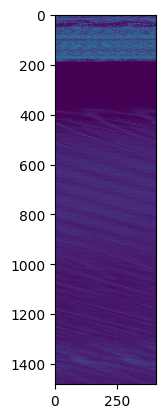

In [59]:
plt.imshow(np.asarray(elems).reshape(1481, 406))
plt.show()

In [56]:
imgplot

In [35]:
import requests

# URL of the Orthanc server
orthanc_url = "http://localhost:8042"

# Path to the DICOMweb API
dicomweb_path = "/dicom-web/servers/default"

# Path to the DICOM instance
# Replace with the actual path to your DICOM instance
instance_path = "/studies/{studyUID}/series/{seriesUID}/instances/{instanceUID}"

# Construct the full URL
url = orthanc_url + dicomweb_path + instance_path
url ='http://amc-tensor1.ucdenver.pvt:808/pacs/dicom-web/studies/1.2.840.114350.2.19.2.798268.2.63361197.1/series/1.3.12.2.1107.5.2.30.26451.201611071353374953214894.0.0.0/instances/1.3.12.2.1107.5.2.30.26451.2016110713534636848814907'

# Send a GET request to the server
response = requests.get(url)

# # The Orthanc identifier is in the 'ID' field of the JSON response
# orthanc_id = response.json()['ID']

# print("Orthanc ID:", orthanc_id)


In [39]:
binary_string = response.content

# Convert the binary string to a BytesIO object
bytes_io = io.BytesIO(binary_string)

# Read the DICOM file from the BytesIO object
ds = pydicom.dcmread(bytes_io)

# Now you can access the DICOM tags
print(ds)

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

In [44]:
binary_string.decode('utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 292: invalid continuation byte